In [1]:
# Load the useful packages
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import os
import sklearn
import seaborn as sns # visualization
import matplotlib.pyplot as plt # plotting
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Common Model Algorithms
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, KBinsDiscretizer
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV   #Performing grid search
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

# machine learning

from keras.utils.np_utils import to_categorical

sns.set(style="darkgrid")

Using TensorFlow backend.


In [2]:
# Input data files are available in the "../input/" directory.
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


In [3]:
# Read train and test datasets and store the information in the appropriate dataframe variables
datadir = '/kaggle/input/titanic/'
data_train = pd.read_csv(os.path.join(datadir, 'train.csv'))
data_test = pd.read_csv(os.path.join(datadir, 'test.csv'))
print("Train dataset shape:", data_train.shape)
print("Test dataset shape:", data_test.shape)

data_train_test = [data_train, data_test]

data_train.head()

Train dataset shape: (891, 12)
Test dataset shape: (418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Age, Cabin and Embarked have null entries in the training set
print(data_train.isnull().sum())
print('-'*50)

# Age, Cabin and Fare have null entries in the training set
print(data_test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
--------------------------------------------------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [5]:
# Describe numerical features
data_train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Cavendish, Mr. Tyrell William",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


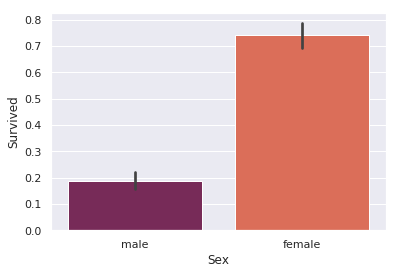

In [6]:
# Outputs the percentage of survivors for each gender
sns.barplot(x='Sex', y='Survived', data = data_train, palette="rocket")

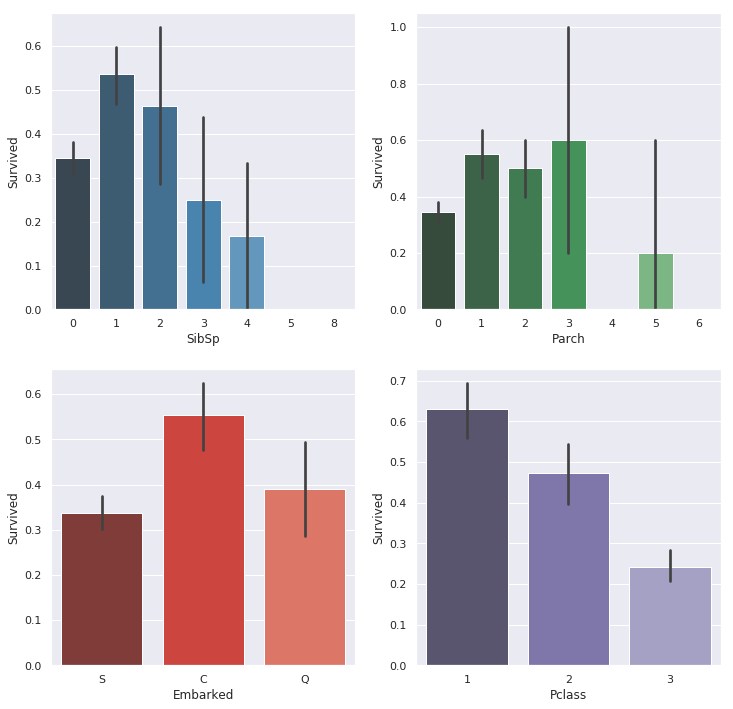

In [7]:
# Outputs the percentage of survivors for each value of the following features
f, ((ax_sibsp, ax_parch), (ax_embarked, ax_pclass)) = plt.subplots(2, 2,figsize=(12,12))
sns.barplot(x='SibSp', y='Survived', data=data_train, palette="Blues_d", ax = ax_sibsp)
sns.barplot(x='Parch', y='Survived', data=data_train, palette="Greens_d", ax = ax_parch)
sns.barplot(x='Embarked', y='Survived', data=data_train, palette="Reds_d", ax = ax_embarked)
sns.barplot(x='Pclass', y='Survived', data=data_train, palette="Purples_d", ax = ax_pclass)

The following four features SibSp, Parch, Embarked and Pclass seem to have an influential role in the survival likeliness.

Therefore those features are considered crucial for future model. Nevertheless, the final decision regarding the usage of a certain feature is only made after feature engineering (creation of new features) and further data analysis (for instance, correlation between features)

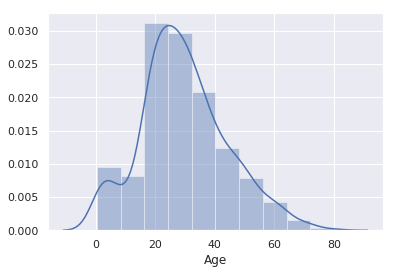

In [8]:
# Distribution plot for the feature Age
sns.distplot(data_train['Age'].dropna(), hist=True, bins=10)

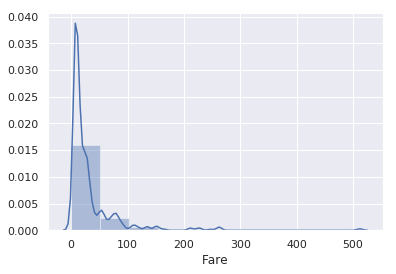

In [9]:
# Distribution plot for the feature Fare
sns.distplot(data_train['Fare'], hist=True, bins=10)

In [10]:
'''
Cabin feature analysis
    204 valid entries
    687 NaN
    
    147 unique values


Pclass    /    Fare     : Cabin Type
1st class / Highest fare: Cabin A to E 
2nd class               : Cabin D to F
3rd class / Lowest fare : Cabin D to G 

Create a new feature called CabinType which consists of the first letter present in Cabin
'''

for data in data_train_test:
    data['CabinType'] = data.Cabin.str.get(0)

cabin_types = data_train['CabinType'].unique()
cabin_types = [x for x in cabin_types if str(x) != 'nan']  # remove the NaN entries
cabin_types.sort() # sort by alphabetically order (important for visualization purposes)

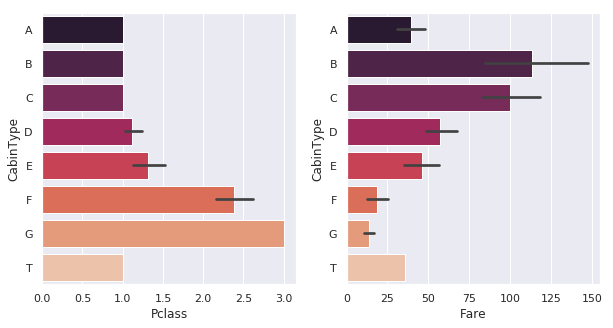

In [11]:
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,5))
sns.barplot(y='CabinType', x='Pclass', data=data_train, palette="rocket", order=cabin_types, ax = ax1)
sns.barplot(y='CabinType', x='Fare', data=data_train, palette="rocket", order=cabin_types, ax = ax2)

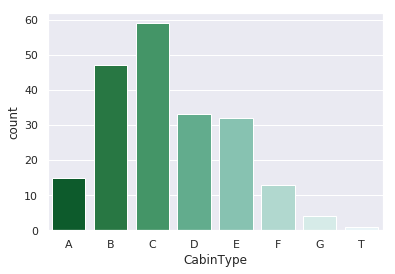

In [12]:
sns.countplot(x='CabinType', data=data_train, order=cabin_types, palette="BuGn_r")

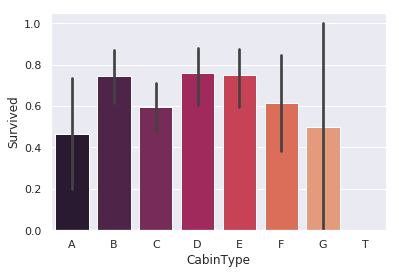

In [13]:
sns.barplot(x='CabinType', y='Survived', data = data_train, palette="rocket", order=cabin_types)

Consider removing CabinType feature (and also Cabin) since it has a lot of missing entries. Over 75% of the its training and testing entries are NaN. 

Also, considering the valid data, the type of cabin doesn't have a specific relationship with the target as can be seen in the bar plot above.

In [14]:
for data in data_train_test:
    data['TicketType'] = data.Ticket.str.split(" ", 1, expand=False).str.get(0)

print(data_train['TicketType'].value_counts())
print("Unique ticket types: ", data_train['TicketType'].nunique())

PC        60
C.A.      27
STON/O    12
A/5       10
W./C.      9
          ..
36967      1
347073     1
315098     1
392091     1
33638      1
Name: TicketType, Length: 557, dtype: int64
Unique ticket types:  557


In [15]:
for data in data_train_test:
    data['Title'] = data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(data_train['Title'], data_train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: Title, dtype: int64


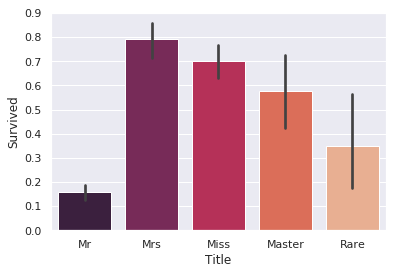

In [16]:
for data in data_train_test:
    data['Title'] = data['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    data['Title'] = data['Title'].replace('Mlle', 'Miss')
    data['Title'] = data['Title'].replace('Ms', 'Miss')
    data['Title'] = data['Title'].replace('Mme', 'Mrs')

print(data_train['Title'].value_counts())
sns.barplot(x='Title', y='Survived', data = data_train, palette="rocket")

Fill missing values for age and other features (use kneighbors for age probably)

In [17]:
title_mapping = {"Master": 0, "Miss": 1, "Mr": 2, "Mrs": 3, "Rare": 4}
for data in data_train_test:
    data['Title'] = data['Title'].map(title_mapping)
    data['Title'] = data['Title'].fillna(0)  # review this fillna 0

   Title        Age
0      0   4.574167
1      1  21.845638
2      2  32.368090
3      3  35.788991
4      4  45.545455


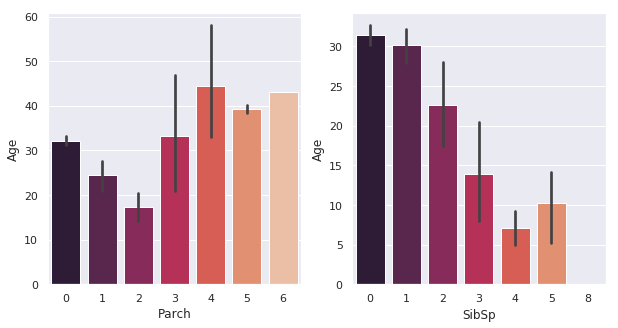

In [18]:
print(data_train[['Title', 'Age']].groupby(['Title'], as_index=False).mean())

f, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,5))
sns.barplot(x='Parch', y='Age', palette="rocket", data=data_train, ax = ax1)
sns.barplot(x='SibSp', y='Age', palette="rocket", data=data_train, ax = ax2)

In [19]:
age_imputer = KNeighborsRegressor(n_neighbors=5)
X_age = data_train[['Title', 'Parch', 'SibSp']]
Y_age = data_train['Age']
age_imputer.fit(X_age, Y_age)
# features that influence age are: Title, Parch, Sibsp
# TODO

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [20]:
for data in data_train_test:
    data['Embarked'].fillna(data['Embarked'].mode()[0], inplace = True)
    data['Fare'].fillna(data['Fare'].median(), inplace = True)
    
    data.info()
    
    # review more complex ways to do this

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
CabinType      204 non-null object
TicketType     891 non-null object
Title          891 non-null int64
dtypes: float64(2), int64(6), object(7)
memory usage: 104.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int

Convert features to numeric formats

In [21]:
labelencoder = LabelEncoder()

for data in data_train_test:
    data['Embarked'] = labelencoder.fit_transform(data['Embarked'])
    data['Sex'] = labelencoder.fit_transform(data['Sex'])
    
    data.head

In [22]:
# review automatic way to divide into bins
data_train['FareBand'] = pd.qcut(data_train['Fare'], 3)
data_train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 8.662]",0.198052
1,"(8.662, 26.0]",0.402778
2,"(26.0, 512.329]",0.559322


In [23]:
for data in data_train_test:
    data.loc[ data['Fare'] <= 8.662, 'Fare'] = 3
    data.loc[(data['Fare'] > 8.662) & (data['Fare'] <= 26), 'Fare'] = 2
    data.loc[ data['Fare'] > 26, 'Fare'] = 1
    data['Fare'] = data['Fare'].astype(int)

data_train = data_train.drop(['FareBand'], axis=1)
data_train_test = [data_train, data_test]
    
data_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinType,TicketType,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,3,NaN,2,NaN,A/5,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,1,C85,0,C,PC,3
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,3,NaN,2,NaN,STON/O2.,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,1,C123,2,C,113803,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,3,NaN,2,NaN,373450,2
5,6,0,3,"Moran, Mr. James",1,NaN,0,0,330877,3,NaN,1,NaN,330877,2
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,1,E46,2,E,17463,2
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,2,NaN,2,NaN,349909,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,2,NaN,2,NaN,347742,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,1,NaN,0,NaN,237736,3


Further feature engineering:

In [24]:
# New feature called SocialStatus = Fare * Pclass
for data in data_train_test:
    data['SocialStatus'] = data.Pclass + data.Fare

    #Discrete variables
    data['FamilySize'] = data ['SibSp'] + data['Parch'] + 1
    data['IsAlone'] = 1 #initialize to yes/1 is alone
    data['IsAlone'].loc[data['FamilySize'] > 1] = 0 # now update to no/0 if family size is greater than 1
    
data_train.loc[:, ['SocialStatus', 'Pclass', 'Fare']].head(10)

,SocialStatus,Pclass,Fare
0,6,3,3
1,2,1,1
2,6,3,3
3,2,1,1
4,6,3,3
5,6,3,3
6,2,1,1
7,5,3,2
8,5,3,2
9,3,2,1


In [25]:
data_train[['SocialStatus', 'Survived']].groupby(['SocialStatus'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SocialStatus,Survived
0,2,0.656863
1,3,0.555556
2,4,0.365482
3,5,0.314815
4,6,0.212014


In [26]:
data_train['AgeBand'] = pd.cut(data_train['Age'], 5)
data_train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.369942
2,"(32.252, 48.168]",0.404255
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [27]:
for data in data_train_test:    
    data.loc[ data['Age'] <= 12, 'Age'] = 0
    data.loc[(data['Age'] > 12) & (data['Age'] <= 24), 'Age'] = 1
    data.loc[(data['Age'] > 24) & (data['Age'] <= 45), 'Age'] = 2
    data.loc[(data['Age'] > 45) & (data['Age'] <= 60), 'Age'] = 3
    data.loc[ data['Age'] > 60, 'Age']
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinType,TicketType,Title,SocialStatus,FamilySize,IsAlone,AgeBand
0,1,0,3,"Braund, Mr. Owen Harris",1,1.0,1,0,A/5 21171,3,NaN,2,NaN,A/5,2,6,2,0,"(16.336, 32.252]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2.0,1,0,PC 17599,1,C85,0,C,PC,3,2,2,0,"(32.252, 48.168]"
2,3,1,3,"Heikkinen, Miss. Laina",0,2.0,0,0,STON/O2. 3101282,3,NaN,2,NaN,STON/O2.,1,6,1,1,"(16.336, 32.252]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2.0,1,0,113803,1,C123,2,C,113803,3,2,2,0,"(32.252, 48.168]"
4,5,0,3,"Allen, Mr. William Henry",1,2.0,0,0,373450,3,NaN,2,NaN,373450,2,6,1,1,"(32.252, 48.168]"


In [28]:
data_train = data_train.drop(['AgeBand'], axis=1)
data_train_test = [data_train, data_test]
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinType,TicketType,Title,SocialStatus,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",1,1.0,1,0,A/5 21171,3,NaN,2,NaN,A/5,2,6,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2.0,1,0,PC 17599,1,C85,0,C,PC,3,2,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,2.0,0,0,STON/O2. 3101282,3,NaN,2,NaN,STON/O2.,1,6,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2.0,1,0,113803,1,C123,2,C,113803,3,2,2,0
4,5,0,3,"Allen, Mr. William Henry",1,2.0,0,0,373450,3,NaN,2,NaN,373450,2,6,1,1


Feature selection

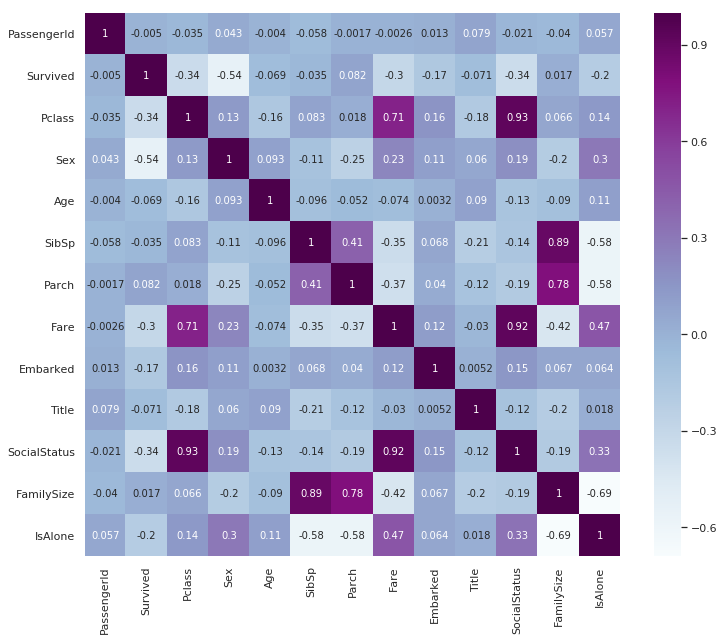

In [29]:
#get correlations of each features in dataset
corrmat = data_train.corr()
#top_corr_features = corrmat.index
plt.figure(figsize=(12,10))
#plot heat map
g=sns.heatmap(data_train.corr(),annot=True,cmap="BuPu")

In [30]:
#review this, probably more features are going to be dropped
data_train.drop(columns=['Name', 'PassengerId'], inplace=True)
data_test.drop(columns=['Name'], inplace=True)

In [31]:
data_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinType,TicketType,Title,SocialStatus,FamilySize,IsAlone
0,0,3,1,1.0,1,0,A/5 21171,3,NaN,2,NaN,A/5,2,6,2,0
1,1,1,0,2.0,1,0,PC 17599,1,C85,0,C,PC,3,2,2,0
2,1,3,0,2.0,0,0,STON/O2. 3101282,3,NaN,2,NaN,STON/O2.,1,6,1,1
3,1,1,0,2.0,1,0,113803,1,C123,2,C,113803,3,2,2,0
4,0,3,1,2.0,0,0,373450,3,NaN,2,NaN,373450,2,6,1,1


In [32]:
X_train = data_train.drop("Survived", axis=1)
Y_train = data_train["Survived"]
X_test  = data_test.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 15), (891,), (418, 15))

Further feature selection using Recursive Feature Elimination

In [33]:
#no of features
nof_list=np.arange(1,12)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train_aux, X_val, y_train_aux, y_val = train_test_split(X_train,Y_train, test_size = 0.3, random_state = 0)
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train_aux,y_train_aux)
    X_val_rfe = rfe.transform(X_val)
    model.fit(X_train_rfe,y_train_aux)
    score = model.score(X_val_rfe,y_val)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

NameError: name 'model' is not defined

In [34]:
cols = list(X_train.columns)
model = RandomForestClassifier()
#Initializing RFE model
rfe = RFE(model, nof)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X_train,Y_train) 
X_test = rfe.transform(X_test)
#Fitting the data to model
model.fit(X_rfe,Y_train)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

ValueError: could not convert string to float: 'A/5 21171'

Random Forest hyperparameter tuning through GridSearch CV

In [35]:
# Choose the type of classifier. 
rf = RandomForestClassifier()

# Choose some parameter combinations to try
rf_parameters = {'n_estimators': [16, 18, 20, 22, 24, 26], 
              'max_features': ['sqrt'], 
              'criterion': ['entropy'],
              'max_depth': [5, 6], 
              'min_samples_split': [4, 5, 6],
              'min_samples_leaf': [6, 7, 8],
              'random_state': [0]
             }
# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

# Run the grid search
grid_obj_rf = GridSearchCV(rf, rf_parameters, scoring=acc_scorer, cv = 3, verbose=2, n_jobs=-1)
grid_obj_rf = grid_obj_rf.fit(X_train, Y_train)

# Set the clf to the best combination of parameters
best_rf = grid_obj_rf.best_estimator_

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


ValueError: could not convert string to float: 'SC/Paris 2163'

In [36]:
model = best_rf
best_rf

NameError: name 'best_rf' is not defined

In [37]:
XGBoost hyperparameter tuning through GridSearch CV

SyntaxError: invalid syntax (<ipython-input-37-ead3e219f49a>, line 1)

In [38]:
xgb1 = XGBClassifier()

xgb_parameters = {'learning_rate': [0.0001] ,
                  'n_estimators': [ 1500, 2500],
                  'max_depth': [4],
                  'min_child_weight': [0, 4, 7 ],
                  'gamma': [ 0.0],
                  'colsample_bytree': [ 0.7],
                  'seed': [27],
                  'subsample': [0.7],
                  'scale_pos_weight': [1],
                  'reg_alpha': [0.00006]
                }

# Run the grid search
grid_obj_xgb = GridSearchCV(xgb1, xgb_parameters, scoring=acc_scorer, cv = 3, verbose=2, n_jobs=-1)
grid_obj_xgb = grid_obj_xgb.fit(X_train, Y_train)

# Set the clf to the best combination of parameters
best_xgb = grid_obj_xgb.best_estimator_

NameError: name 'XGBClassifier' is not defined

In [39]:
print(grid_obj_xgb.cv_results_['mean_test_score'].max())
print(best_xgb)

NameError: name 'grid_obj_xgb' is not defined

Select the best algorithm (between the optimized Random Forest and XGBoost)

In [40]:
# TODO: select the best algorithm, compare the mean test scores and also check overfitting

In [41]:
best_model.fit(X_rfe, Y_train)
Y_pred = best_model.predict(X_test)

NameError: name 'best_model' is not defined

In [42]:
#best RF
submission = pd.DataFrame({'PassengerId': data_test['PassengerId'], 'Survived': Y_pred})
submission.to_csv('submission.csv',index=False)
submission.head()

NameError: name 'Y_pred' is not defined